Confusion matrix
 [[113   8   7   1]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   3   0  19]]

F1 score
               precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.98      0.98      0.98       397
       vgood       0.90      0.76      0.83        25

    accuracy                           0.94       571
   macro avg       0.85      0.87      0.85       571
weighted avg       0.95      0.94      0.94       571



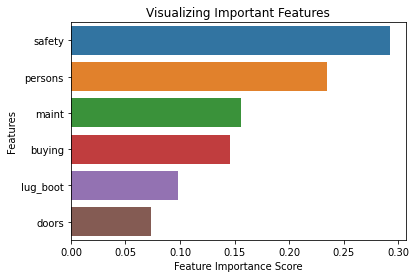

In [11]:
## scikit-learn's RandomForestClassifier

# import necessary packages/functions
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from graphviz import Source
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt 

# load the data into dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data (1).csv')

# get feature vector
X = df.drop(['class'], axis=1)

# get target variable
y = df['class']

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# encoding variables
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

#Create a RandomForestClassifier
clf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# confusion matrix and f1 score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('\nF1 score\n', classification_report(y_test, y_pred))

# visualizing the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

# plt.show()

plt.savefig('feature_bar_plot.png')

Confusion matrix
 [[ 98   0  31   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]

F1 score
               precision    recall  f1-score   support

         acc       0.63      0.76      0.69       129
        good       0.00      0.00      0.00        20
       unacc       0.93      0.97      0.95       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.85       571
   macro avg       0.39      0.43      0.41       571
weighted avg       0.79      0.85      0.81       571



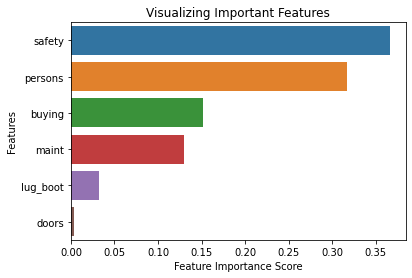

In [12]:
#Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# confusion matrix and f1 score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('\nF1 score\n', classification_report(y_test, y_pred))

# visualizing the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

# plt.show()

plt.savefig('feature_bar_plot.png')